# Exploring LLM Chains with LCEL

In [1]:
!pip install langchain==0.2.0 --quiet
!pip install langchain-openai==0.1.7 --quiet
!pip install langchain-community==0.2.0 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.1/397.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [2]:
# for drawing text graphs
!pip install grandalf --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.6 MB/s eta 0:00:00


In [3]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPEN_API_KEY')
os.environ['HUGGINGFACEHUB_API_TOKEN'] = userdata.get('HF_TOKEN')

In [4]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

### LLM Chain with LCEL

LangChain Expression Language (LCEL) connects prompts, models, parsers and retrieval components using a `|` pipe operator.

Any runnables can be "chained" together into sequences. The output of the previous runnable's `.invoke()` call is passed as input to the next runnable. This can be done using the pipe operator `(|)`, or the more explicit `.pipe()` method, which does the same thing.

The resulting `RunnableSequence` is itself a runnable, which means it can be invoked, streamed, or further chained just like any other runnable.

In [5]:
from langchain_core.prompts import ChatPromptTemplate

prompt_txt = """Explain to me about {topic} in 3 bullet points"""
prompt = ChatPromptTemplate.from_template(prompt_txt)

# you can also write this as llm_chain = prompt | chatgpt

llm_chain = (
    prompt
      |
    chatgpt
)

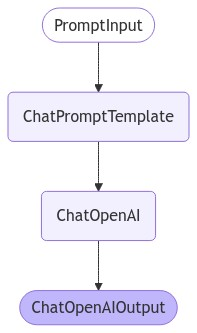

In [6]:
from IPython.display import Image, display

display(Image(llm_chain.get_graph().draw_mermaid_png()))

In [7]:
print(llm_chain.get_graph().draw_ascii())

    +-------------+    
    | PromptInput |    
    +-------------+    
           *           
           *           
           *           
+--------------------+ 
| ChatPromptTemplate | 
+--------------------+ 
           *           
           *           
           *           
    +------------+     
    | ChatOpenAI |     
    +------------+     
           *           
           *           
           *           
 +------------------+  
 | ChatOpenAIOutput |  
 +------------------+  


In [8]:
response = llm_chain.invoke({'topic': 'Generative AI'})
response

AIMessage(content='- Generative AI is a type of artificial intelligence that is capable of creating new content, such as images, text, or music, based on patterns and data it has been trained on.\n- This technology uses algorithms to generate content that is original and unique, often mimicking human creativity and imagination.\n- Generative AI has a wide range of applications, including creating art, writing stories, composing music, and even designing products.', response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 20, 'total_tokens': 107, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-bba06c36-1dbd-4175-a72c-2f95471e80c5-0')

In [9]:
print(response.content)

- Generative AI is a type of artificial intelligence that is capable of creating new content, such as images, text, or music, based on patterns and data it has been trained on.
- This technology uses algorithms to generate content that is original and unique, often mimicking human creativity and imagination.
- Generative AI has a wide range of applications, including creating art, writing stories, composing music, and even designing products.


In [10]:
from langchain_core.output_parsers import StrOutputParser

# chain with an output parser
llm_chain = (
    prompt
      |
    chatgpt
      |
    StrOutputParser()
)

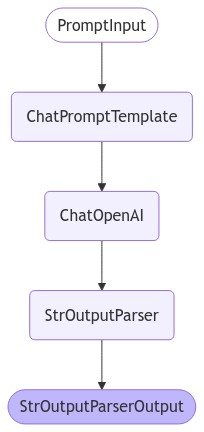

In [11]:
display(Image(llm_chain.get_graph().draw_mermaid_png()))

In [12]:
response = llm_chain.invoke({'topic': 'Generative AI'})
print(response)

- Generative AI is a type of artificial intelligence that is capable of creating new content, such as images, text, or music, based on patterns and data it has been trained on.
- This technology uses algorithms to generate content that is original and unique, often mimicking human creativity and imagination.
- Generative AI has a wide range of applications, including creating art, writing stories, and composing music, and is increasingly being used in industries such as marketing, design, and entertainment.


In [13]:
reviews = [
    f"""
    Purchased this adorable koala plush toy for my nephew's birthday,
    and he's absolutely smitten with it, carrying it around everywhere he goes.
    The plush is incredibly soft, and the koala's face has an endearing expression.
    However, I did find it a tad on the smaller side given its price point.
    I believe there may be larger alternatives available at a similar price.
    To my delight, it arrived a day earlier than anticipated,
    allowing me to enjoy it briefly before gifting it to him.
    """,
    f"""
    Required a stylish lamp for my office space, and this particular one
    came with added storage at a reasonable price.
    The delivery was surprisingly quick, arriving within just two days.
    However, the pull string for the lamp suffered damage during transit.
    To my relief, the company promptly dispatched a replacement,
    which arrived within a few days. Assembly was a breeze.
    Then, I encountered an issue with a missing component,
    but their support team responded swiftly and provided the missing part.
    It appears to be a commendable company that genuinely values its
    customers and the quality of its products.
    """
    ]

In [14]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """
            Act as a product review analyst.
            Your task is to generate a short summary of a product
            review from an ecommerce site.

            Generate a summary of the review (max 2 lines)
            Also show both the positives and negatives from the review (max 2 bullets)

            ```{review}```
"""

prompt_template = ChatPromptTemplate.from_template(prompt)
llm_chain = (
    prompt_template
      |
    chatgpt
      |
    StrOutputParser()
)

In [15]:
result = llm_chain.invoke({'review': reviews[0]})

In [16]:
result

"Summary: Adorable koala plush toy loved by recipient, but slightly small for the price.\n\nPositives:\n- Incredibly soft plush material\n- Endearing expression on the koala's face\n\nNegatives:\n- Size is smaller than expected for the price\n- Larger alternatives may be available at a similar price"

In [17]:
print(result)

Summary: Adorable koala plush toy loved by recipient, but slightly small for the price.

Positives:
- Incredibly soft plush material
- Endearing expression on the koala's face

Negatives:
- Size is smaller than expected for the price
- Larger alternatives may be available at a similar price


In [18]:
formatted_reviews = [{'review': review}
                        for review in reviews]

results = llm_chain.map().invoke(formatted_reviews)
len(results)

2

In [19]:
for result in results:
    print(result)
    print()

Summary: Adorable koala plush toy loved by recipient, but slightly small for the price.

Positives:
- Incredibly soft plush material
- Endearing expression on the koala's face

Negatives:
- Size is smaller than expected for the price
- Larger alternatives may be available at a similar price

Summary: Stylish lamp with added storage, quick delivery, excellent customer service.

Positives:
- Stylish lamp with added storage
- Quick delivery and excellent customer service

Negatives:
- Pull string for lamp suffered damage during transit
- Missing component issue encountered

